# Dataset : bioinf.nl/~davelangers/datasets/faces.zip

In [32]:
import faces

In [33]:
(x_train, y_train), (x_test, y_test) = faces.load_data()

In [34]:
x_train.shape,x_train.dtype

((10000, 64, 64, 3), dtype('uint8'))

In [35]:
y_train.shape, y_train.dtype

((10000, 3), dtype('uint8'))

In [36]:
x_train = x_train/255
x_test = x_test/255

/commons/conda/lib/python3.8/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


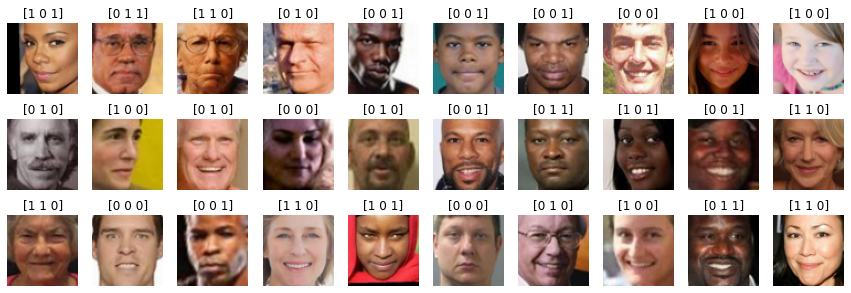

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for img in range(30):
    plt.subplot(3, 10, img+1)
    plt.imshow(x_train[img], cmap=plt.cm.binary)
    plt.axis(False)
    plt.title(y_train[img])
plt.show()

In [29]:
# Deep learning 
from tensorflow import keras
# create model
neural = keras.models.Sequential()

neural.add(keras.layers.InputLayer(input_shape=(64,64,3), name='Input'))  # use 10, to add as tuple, we have 10 samples
neural.add(keras.layers.Flatten())
neural.add(keras.layers.Dense(units=256, activation='relu', name='Hidden_1'))
neural.add(keras.layers.Dense(units=64, activation='relu', name='Hidden_2'))
neural.add(keras.layers.Dense(units=16, activation='relu', name='Hidden_3'))
neural.add(keras.layers.Dense(units=3, activation='sigmoid', name='Output'))

neural.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 12288)             0         
_________________________________________________________________
Hidden_1 (Dense)             (None, 256)               3145984   
_________________________________________________________________
Hidden_2 (Dense)             (None, 64)                16448     
_________________________________________________________________
Hidden_3 (Dense)             (None, 16)                1040      
_________________________________________________________________
Output (Dense)               (None, 3)                 51        
Total params: 3,163,523
Trainable params: 3,163,523
Non-trainable params: 0
_________________________________________________________________


In [30]:
neural.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.RMSprop(),
    metrics=keras.metrics.BinaryAccuracy()
)
history = neural.fit(
    x=x_train,
    y=y_train,
    epochs=20,
    batch_size=40,
    verbose=2,
    validation_data=(x_test, y_test)
)

Epoch 1/20
250/250 - 6s - loss: 0.8147 - binary_accuracy: 0.6306 - val_loss: 0.6635 - val_binary_accuracy: 0.6083
Epoch 2/20
250/250 - 5s - loss: 0.5470 - binary_accuracy: 0.7218 - val_loss: 0.6320 - val_binary_accuracy: 0.7073
Epoch 3/20
250/250 - 5s - loss: 0.4910 - binary_accuracy: 0.7646 - val_loss: 0.4278 - val_binary_accuracy: 0.8112
Epoch 4/20
250/250 - 5s - loss: 0.4594 - binary_accuracy: 0.7828 - val_loss: 0.4044 - val_binary_accuracy: 0.8239
Epoch 5/20
250/250 - 5s - loss: 0.4330 - binary_accuracy: 0.7976 - val_loss: 0.4188 - val_binary_accuracy: 0.8043
Epoch 6/20
250/250 - 4s - loss: 0.4168 - binary_accuracy: 0.8083 - val_loss: 0.4824 - val_binary_accuracy: 0.7820
Epoch 7/20
250/250 - 4s - loss: 0.4016 - binary_accuracy: 0.8193 - val_loss: 0.4224 - val_binary_accuracy: 0.8135
Epoch 8/20
250/250 - 5s - loss: 0.3899 - binary_accuracy: 0.8222 - val_loss: 0.3875 - val_binary_accuracy: 0.8272
Epoch 9/20
250/250 - 5s - loss: 0.3815 - binary_accuracy: 0.8286 - val_loss: 0.3545 - va

In [31]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

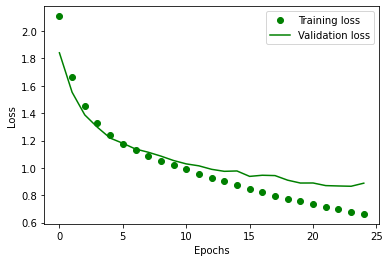

In [ ]:
plt.plot(history.history['loss'], 'go', label='Training loss')
plt.plot(history.history['val_loss'], 'g-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np

yhat_test = neural.predict(x_test)
label_test = np.argmax(yhat_test, axis=1)
label_test

313/313 [==============================] - 1s 2ms/step


array([8, 1, 9, ..., 6, 6, 5])

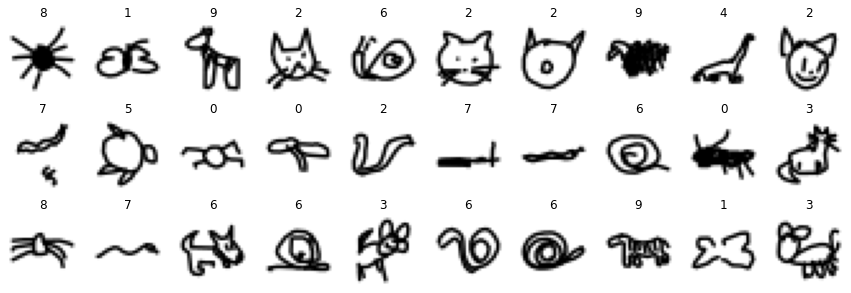

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for img in range(30):
    plt.subplot(3, 10, img+1)
    plt.imshow(x_test[img].reshape((28, 28)), cmap=plt.cm.binary)
    plt.axis(False)
    plt.title(str(label_test[img]))
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

conmat = confusion_matrix(np.argmax(y_test, axis=1), label_test)
conmat

array([[630,  24,  62,  55,  19,   8,  27,  74,  41,  42],
       [ 20, 859,  42,  21,   0,  13,  37,  11,   9,   6],
       [ 31,  17, 716,  63,  12,  11,  56,  30,  30,  15],
       [ 99,  26, 156, 492,  26,  35,  70,  67,  11,  52],
       [ 20,   0,  11,   9, 889,   0,   2,  50,   1,   9],
       [ 47,  19,  81,  52,   3, 581,  39,  32,  69,  66],
       [ 22,   6,  37,  16,   5,   5, 824,  18,   8,  10],
       [ 25,   7,  20,  25,  53,   7,  31, 844,   5,   4],
       [112,  22,  63,  21,   3,  40,  22,  12, 650,  22],
       [ 45,   4,  33,  71,  18,  25,  39,  10,  10, 811]])

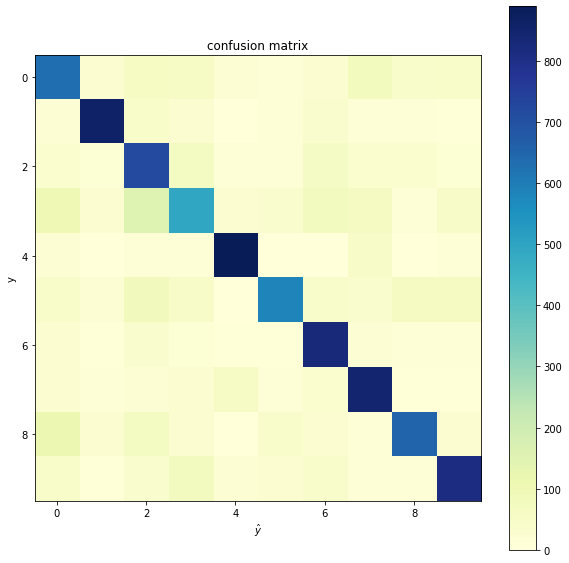

In [ ]:
plt.subplots(figsize=(10, 10))
plt.imshow(conmat, cmap=plt.cm.YlGnBu, vmin=0.0)
plt.xlabel('$\hat{y}$')
plt.ylabel('y')
plt.colorbar()
plt.title('confusion matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score
print(f'Acc: {accuracy_score(np.argmax(y_test, axis=1), label_test):.3}')
print(f'bAcc: {balanced_accuracy_score(np.argmax(y_test, axis=1), label_test):.3}')

Acc: 0.73
bAcc: 0.73


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), label_test, digits=4))

              precision    recall  f1-score   support

           0     0.5994    0.6415    0.6198       982
           1     0.8730    0.8438    0.8581      1018
           2     0.5864    0.7299    0.6503       981
           3     0.5964    0.4758    0.5293      1034
           4     0.8648    0.8971    0.8806       991
           5     0.8014    0.5875    0.6779       989
           6     0.7184    0.8665    0.7855       951
           7     0.7352    0.8266    0.7782      1021
           8     0.7794    0.6722    0.7218       967
           9     0.7821    0.7608    0.7713      1066

    accuracy                         0.7296     10000
   macro avg     0.7336    0.7302    0.7273     10000
weighted avg     0.7340    0.7296    0.7272     10000



In [ ]:
neural.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.RMSprop(),
    metrics=keras.metrics.CategoricalAccuracy()
)
history = neural.fit(
    x=x_train,
    y=y_train,
    epochs=25,
    batch_size=100,
    verbose=1,
    validation_data=(x_test, y_test)
)

In [ ]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

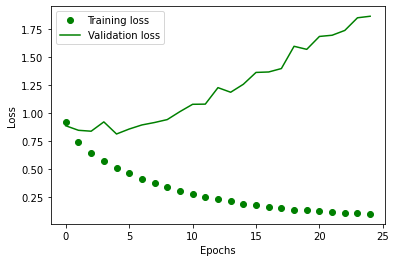

In [ ]:
plt.plot(history.history['loss'], 'go', label='Training loss')
plt.plot(history.history['val_loss'], 'g-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score
print(f'Acc: {accuracy_score(np.argmax(y_test, axis=1), label_test):.3}')
print(f'bAcc: {balanced_accuracy_score(np.argmax(y_test, axis=1), label_test):.3}')

Acc: 0.73
bAcc: 0.73
